In [5]:
import yfinance as yf

# Download historical stock data
ticker = 'AAPL'  # Example: Apple Inc.
data_stock = yf.download(ticker, start='2010-01-01', end='2024-01-01')


[*********************100%%**********************]  1 of 1 completed


In [7]:
data_stock.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [9]:
data_stock.shape


(3522, 6)

In [10]:
data_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,59.883701,60.528731,59.267621,59.926226,57.768185,2.422834e+08
std,55.387520,56.014467,54.812449,55.444533,55.706710,2.204578e+08
min,6.870357,7.000000,6.794643,6.858929,5.798900,2.404830e+07
25%,19.680447,19.832321,19.402321,19.608571,17.005854,9.266760e+07
50%,32.303749,32.633751,32.078751,32.340000,29.137100,1.526602e+08
75%,91.213125,92.512501,90.425623,91.207499,89.074636,3.284715e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.880998e+09


In [12]:
data_stock.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3522 non-null   float64
 1   High       3522 non-null   float64
 2   Low        3522 non-null   float64
 3   Close      3522 non-null   float64
 4   Adj Close  3522 non-null   float64
 5   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt

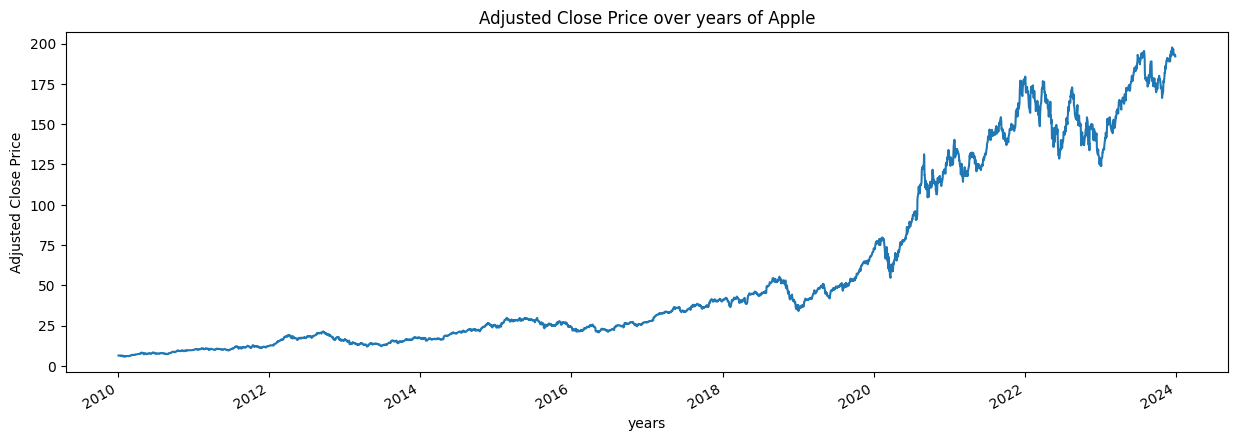

In [17]:
plt.figure(figsize=(15,5))
data_stock["Adj Close"].plot()
plt.xlabel("years")
plt.ylabel("Adjusted Close Price")
plt.title("Adjusted Close Price over years of Apple")
plt.show()

In [18]:
def plotGraph(data_stock, column):
    plt.figure(figsize=(15,5))
    data_stock[column].plot()
    plt.xlabel("years")
    plt.ylabel(column)
    plt.title(column+" over years of Apple")
    plt.show()

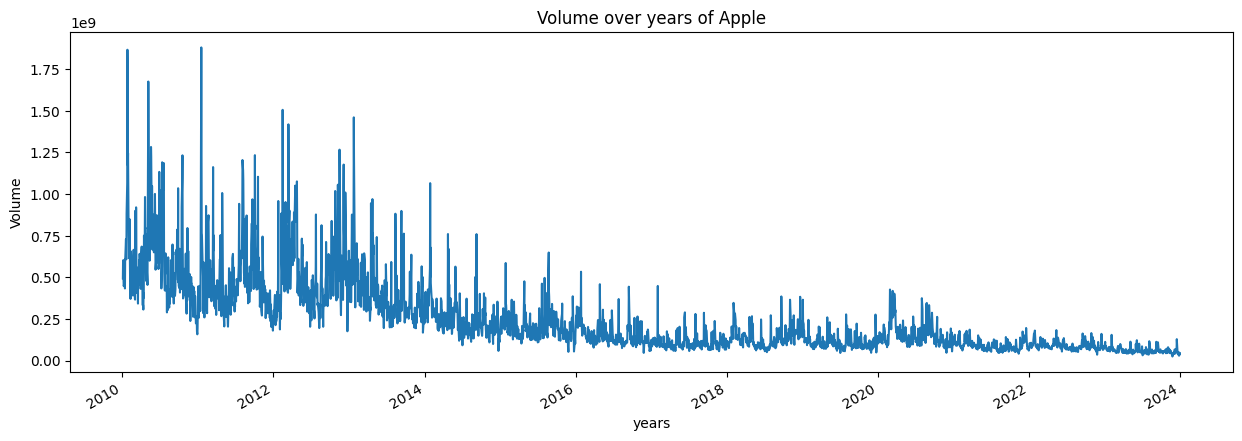

In [19]:
plotGraph(data_stock, "Volume")

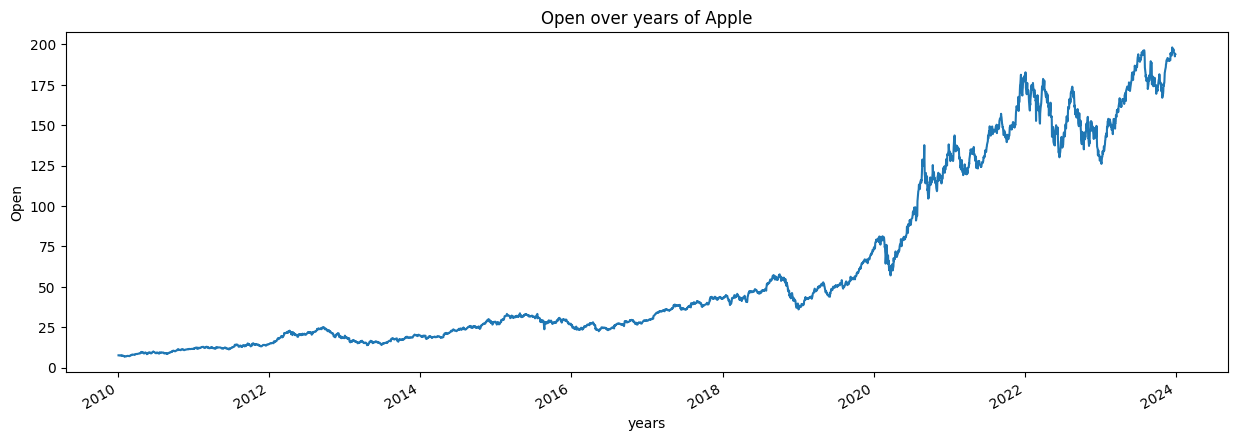

In [20]:
plotGraph(data_stock, "Open")

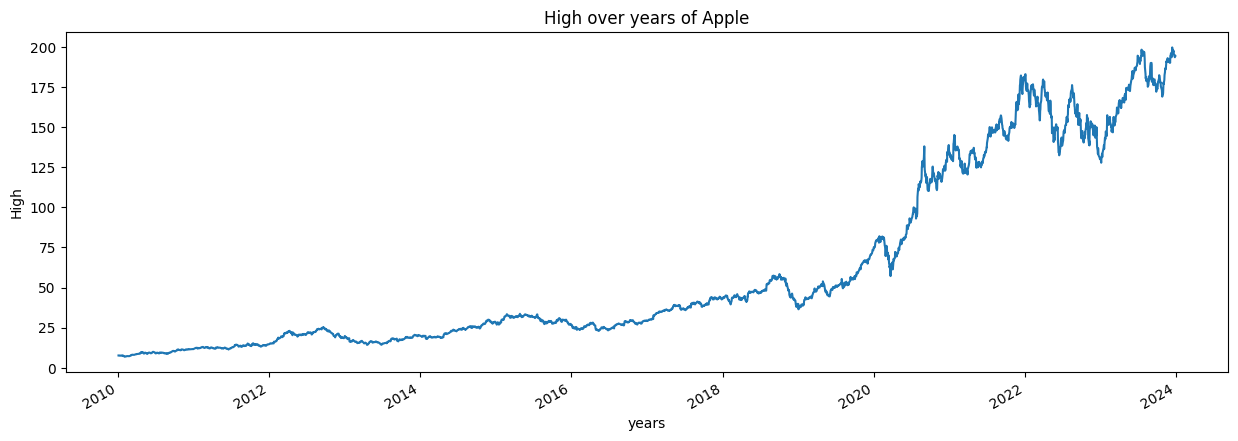

In [21]:
plotGraph(data_stock, "High")

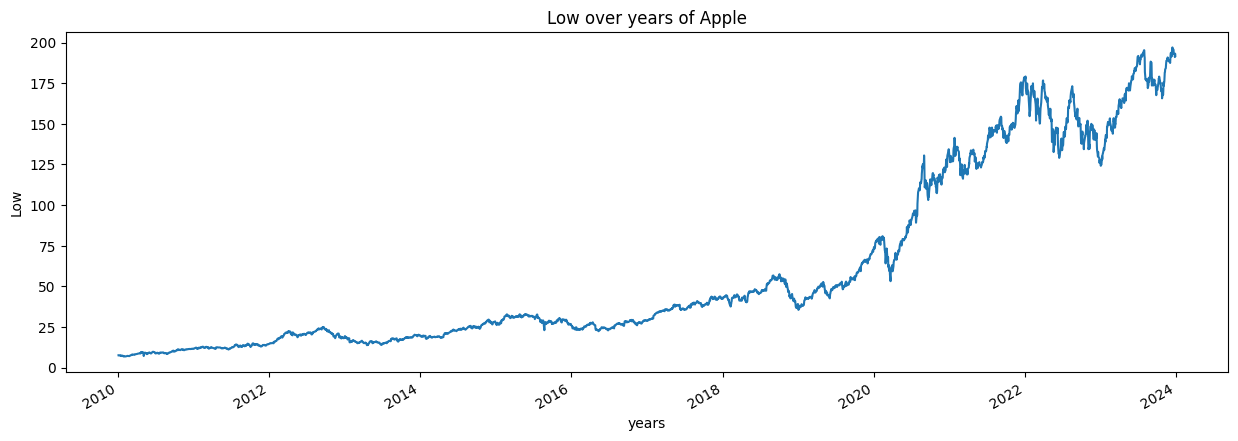

In [22]:
plotGraph(data_stock, "Low")

In [32]:
import seaborn as sns
# define a fct to visualize the relationship between var/target 
def relationship(data_stock, column):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='Adj Close', data=data_stock)
    plt.title(column+' vs Target')
    plt.xlabel(column)
    plt.ylabel('Adj Close')
    plt.show()


In [33]:
# z-score normalization : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
data_stock['Volume_Z_Score'] = scaler.fit_transform(data_stock[['Volume']])
data_stock['Open_Z_Score'] = scaler.fit_transform(data_stock[['Open']])
data_stock['High_Z_Score'] = scaler.fit_transform(data_stock[['High']])
data_stock['Low_Z_Score'] = scaler.fit_transform(data_stock[['Volume']])


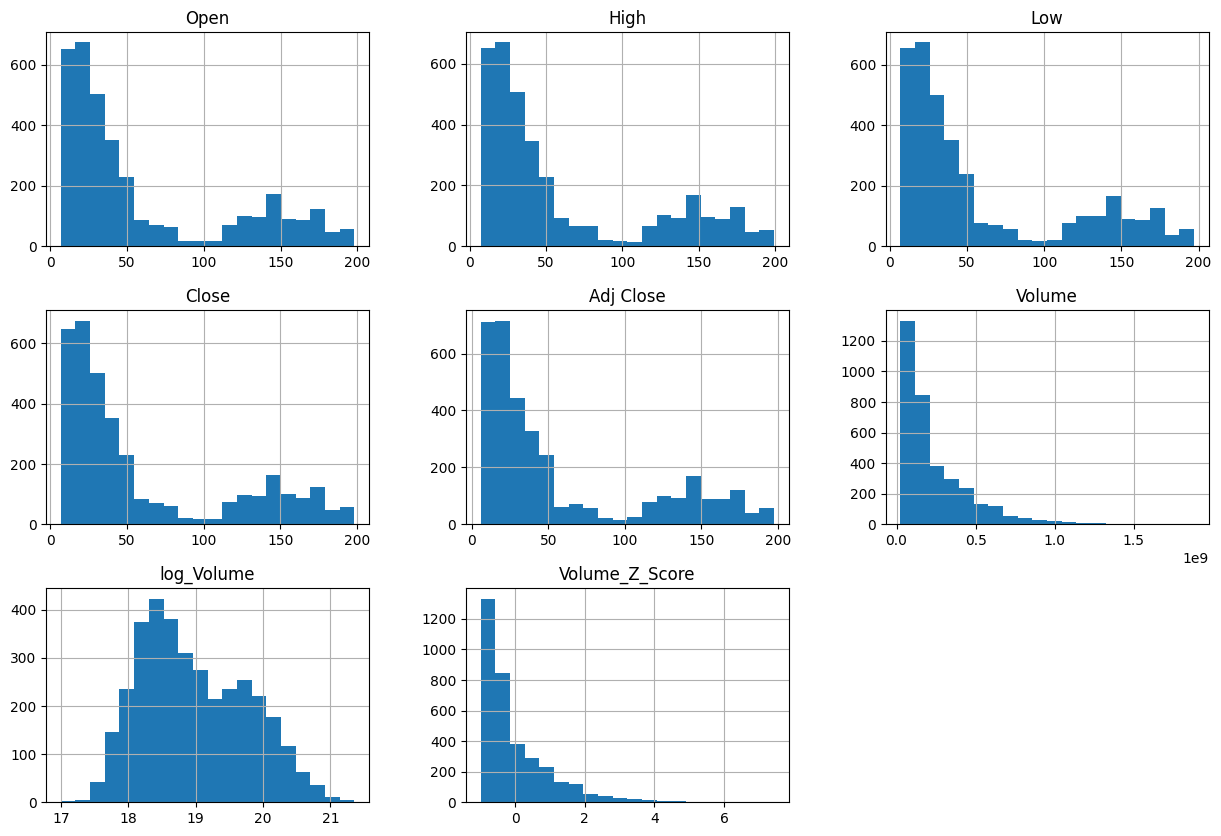

In [36]:
# Plot histograms for each feature and the target variable
data_stock.hist(bins=20, figsize=(15, 10))
plt.show()

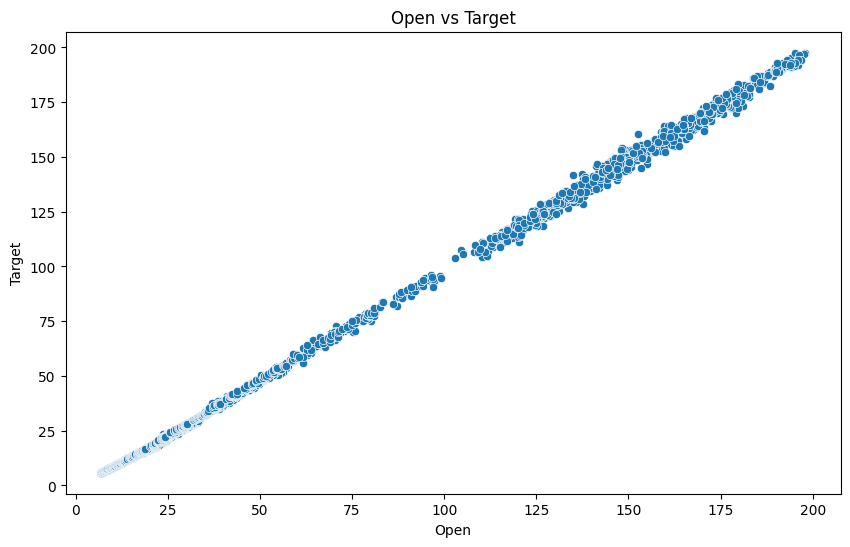

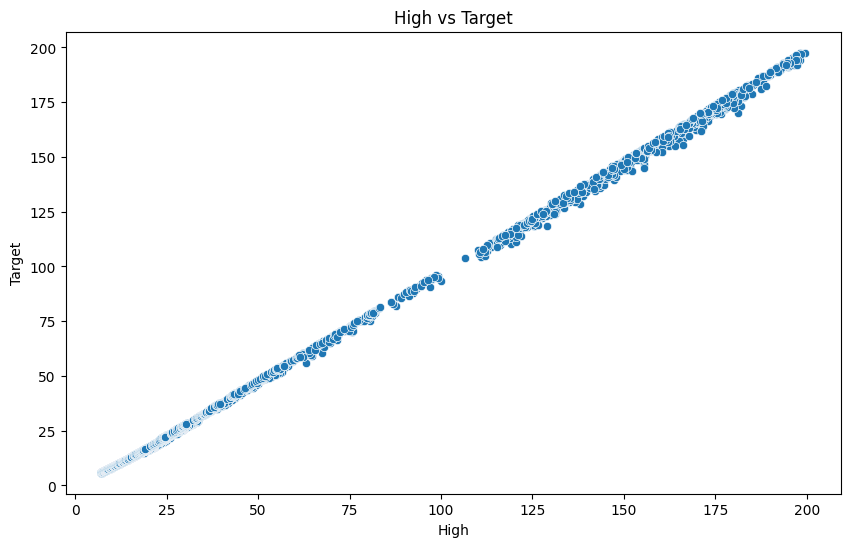

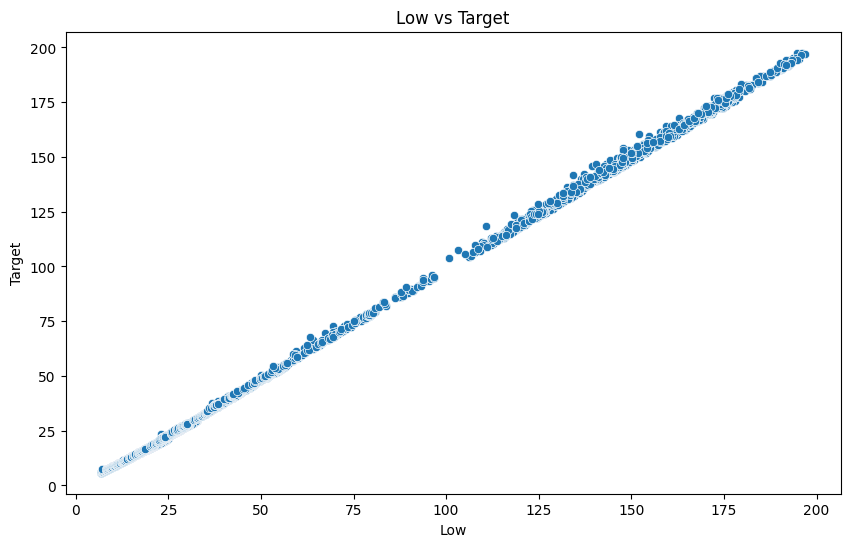

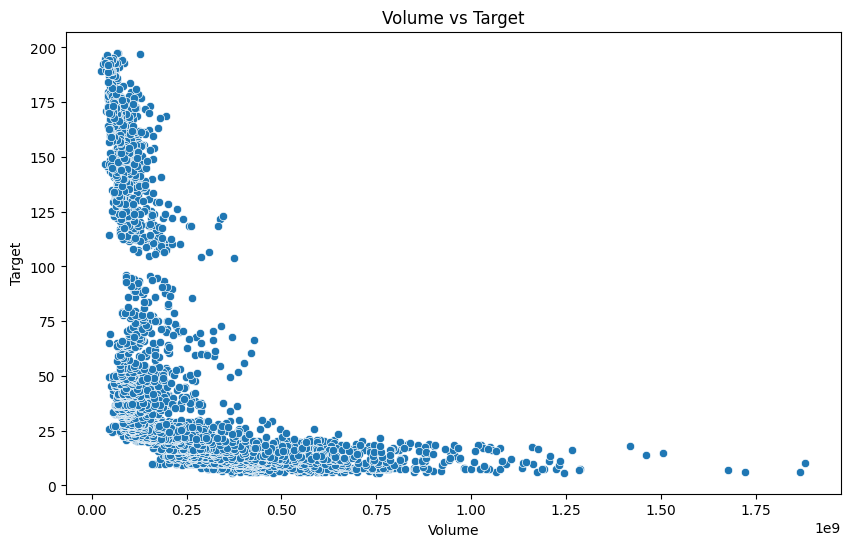

In [26]:
#relationship(data_stock, 'Close')
relationship(data_stock, 'Open')
relationship(data_stock, 'High')
relationship(data_stock, 'Low')
relationship(data_stock, 'Volume')


In [27]:
# transform volume future into normal distribution 
import numpy as np
data_stock['log_Volume'] = np.log1p(data_stock['Volume'])

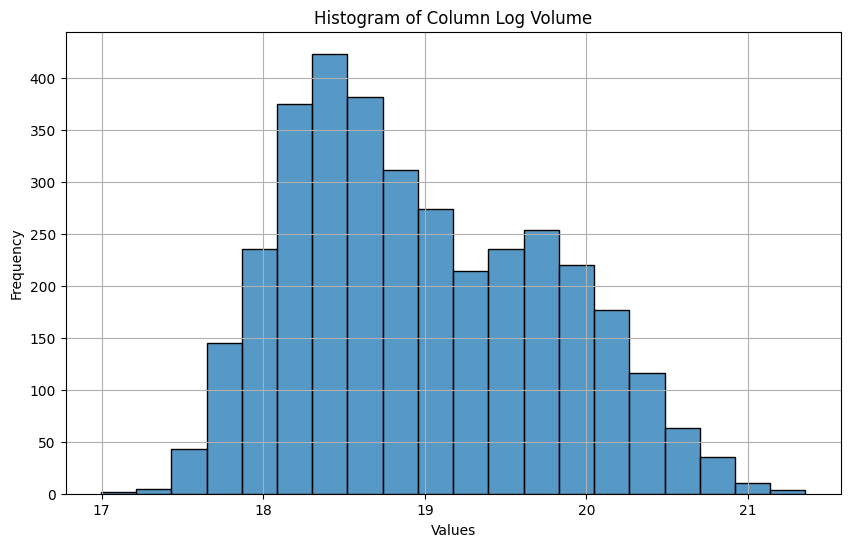

In [28]:
# Plot a histogram of column 'log_Volume'
plt.figure(figsize=(10, 6))
sns.histplot(data_stock['log_Volume'], bins=20, kde=False)  # `kde` adds a kernel density estimate if True
plt.title('Histogram of Column Log Volume')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [30]:
data_stock['log_Volume'].max()


np.float64(21.35506832453215)

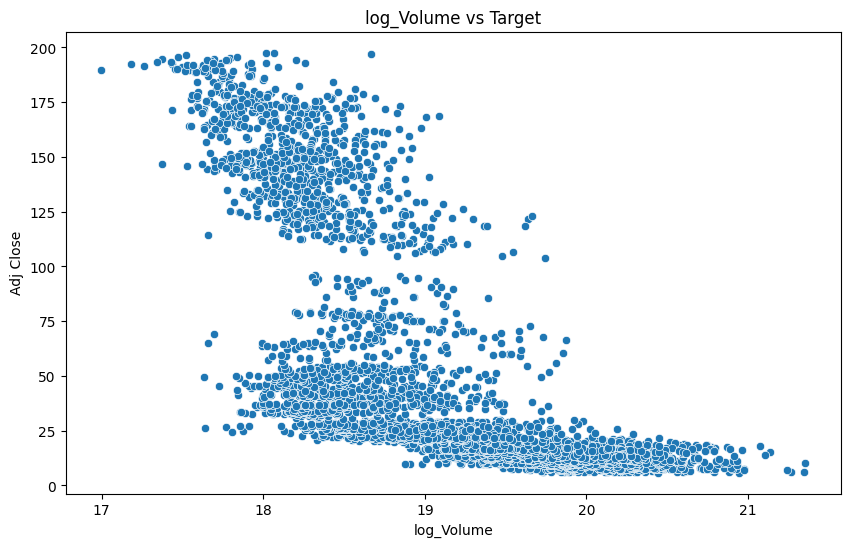

In [37]:
# visyalize relationship after log transform on Volume 
relationship(data_stock, 'log_Volume')


In [53]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

data_stock['Volume ^2'] = data_stock['Volume'] * data_stock['Volume']

In [61]:
data_stock.head()

,Open,High,Low,Close,Adj Close,Volume,log_Volume,Volume_Z_Score,Volume ^2,sqrt Volume,Open_Z_Score,High_Z_Score,Low_Z_Score
Date,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600,20.017499,1.140726,243768917916160000,22220.027003,-0.943690,-0.943962,1.140726
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800,20.215610,1.631480,362289388263040000,24533.748185,-0.942935,-0.943267,1.631480
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000,20.129348,1.405804,304880665600000000,23498.085028,-0.943077,-0.943496,1.405804
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200,19.983302,1.065424,227654182013440000,21843.333079,-0.944773,-0.945556,1.065424
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800,19.919435,0.931500,200355428276640000,21156.814505,-0.945708,-0.945556,0.931500


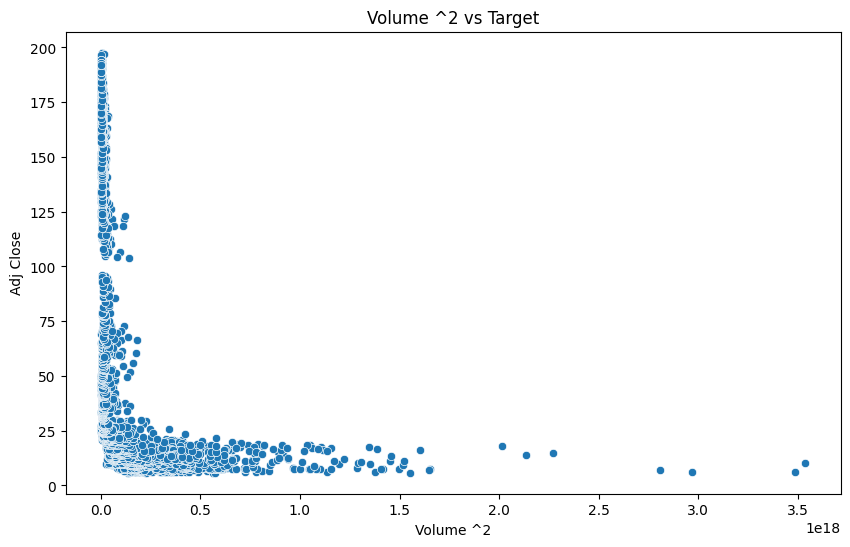

In [55]:
relationship(data_stock, 'Volume ^2')

In [56]:
data_stock['sqrt Volume'] = np.sqrt(data_stock['Volume'])

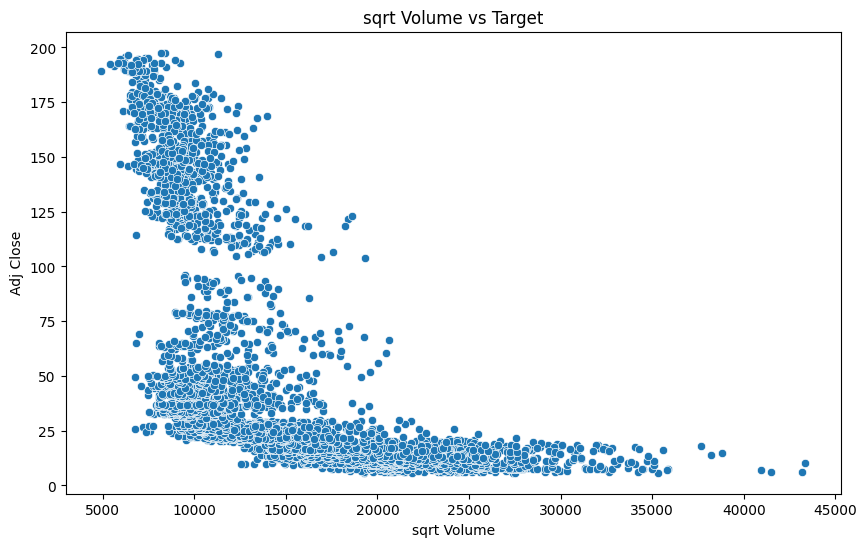

In [57]:
relationship(data_stock, 'sqrt Volume')

In [62]:
new_data = data_stock[["Open_Z_Score", "High_Z_Score", "Low_Z_Score", "Volume_Z_Score","Adj Close"]]


In [63]:
new_data.head()

,Open_Z_Score,High_Z_Score,Low_Z_Score,Volume_Z_Score,Adj Close
Date,,,,,
2010-01-04,-0.943690,-0.943962,1.140726,1.140726,6.461977
2010-01-05,-0.942935,-0.943267,1.631480,1.631480,6.473150
2010-01-06,-0.943077,-0.943496,1.405804,1.405804,6.370185
2010-01-07,-0.944773,-0.945556,1.065424,1.065424,6.358408
2010-01-08,-0.945708,-0.945556,0.931500,0.931500,6.400682


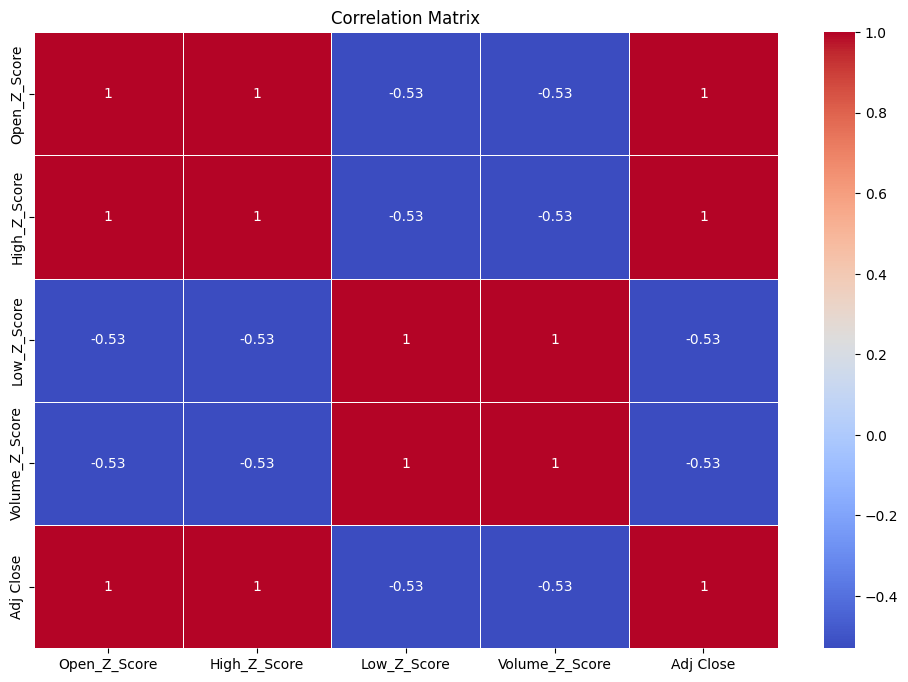

Open_Z_Score      0.999716
High_Z_Score      0.999832
Low_Z_Score      -0.528539
Volume_Z_Score   -0.528539
Adj Close         1.000000
Name: Adj Close, dtype: float64


In [64]:

correlation_matrix = new_data.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
target_corr = correlation_matrix['Adj Close']

# Print correlation values with the target variable
print(target_corr)

# Decide on feature retention
#threshold = 0.1  # Example threshold for correlation value
#significant_features = target_corr[target_corr.abs() > threshold].index.tolist()
#print(f"Significant features to keep: {significant_features}")
